In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

In [10]:
ESS_data = pd.read_csv('ESS_practice_data.csv')

In [11]:
ESS_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [43]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['cntry','year'],as_index=False)['ppltrst'].mean()
ESS_data_year_country_2014 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','year'],as_index=False)['ppltrst'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)
ESS_data_year_country = pd.concat([ESS_data_year_country, ESS_data_year_country_2014],ignore_index=False)

In [44]:
ESS_data_year_country.head()

,cntry,year,ppltrst
0,CH,6,5.677878
1,CZ,6,4.362519
2,DE,6,5.214286
3,ES,6,5.114592
4,NO,6,6.649315


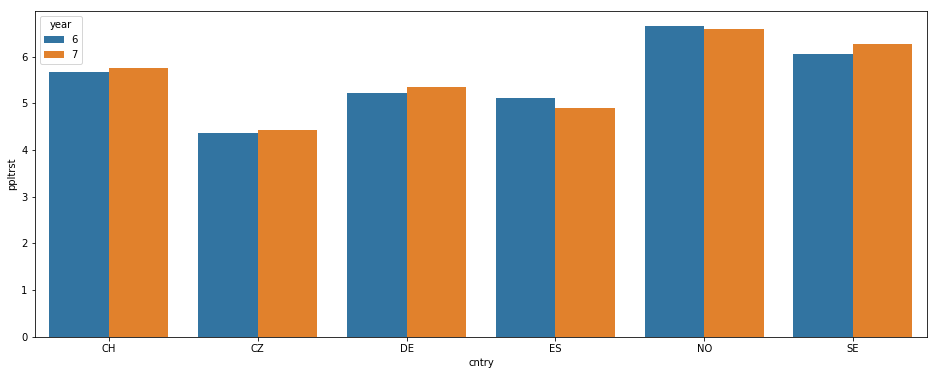

In [47]:
plt.figure(figsize=(16,6))
sns.barplot(x='cntry',y='ppltrst',data=ESS_data_year_country, hue='year')
plt.show()

Trust increased from 2012 to 2014 in CH, CZ, DE, and SE, but not in ES and NO.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [48]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['cntry','year'],as_index=False)['happy'].mean()
ESS_data_year_country_2014 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','year'],as_index=False)['happy'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)
ESS_data_year_country = pd.concat([ESS_data_year_country, ESS_data_year_country_2014],ignore_index=False)

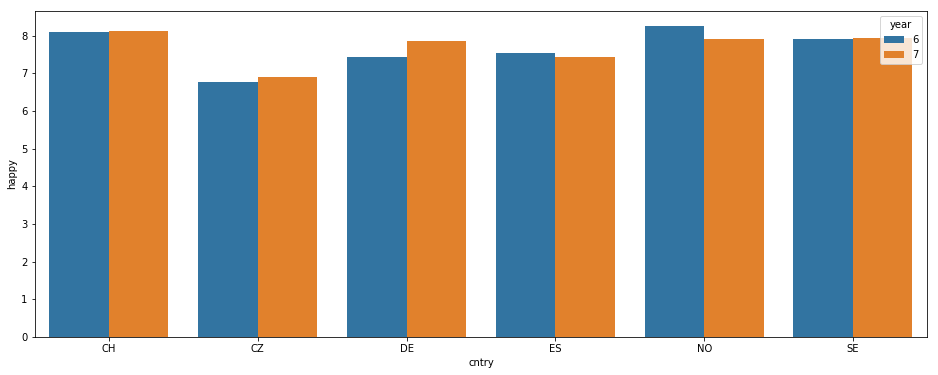

In [49]:
plt.figure(figsize=(16,6))
sns.barplot(x='cntry',y='happy',data=ESS_data_year_country, hue='year')
plt.show()

People became happier in CZ and DE and slightly happier in CH and SE. They became less happy in ES and NO.

3. Who reported watching more TV in 2012, men or women?

In [50]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['gndr'],as_index=False)['tvtot'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)

In [53]:
ESS_data_year_country

,gndr,tvtot
0,1.0,3.901906
1,2.0,3.944393


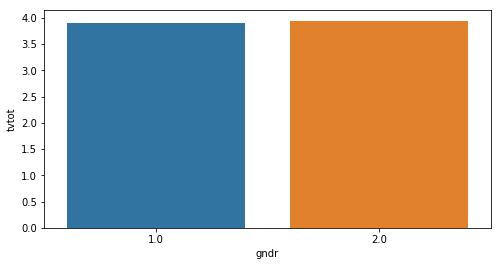

In [57]:
plt.figure(figsize=(8,4))
sns.barplot(x='gndr',y='tvtot',data=ESS_data_year_country)
plt.show()

Women reported watching more tv in 2012 by 1% total tv time on average.

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [60]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['partner'],as_index=False)['pplfair'].mean()
ESS_data_year_country_2012

,partner,pplfair
0,1.0,6.080736
1,2.0,5.856965


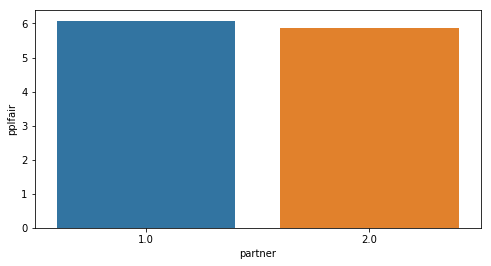

In [61]:
plt.figure(figsize=(8,4))
sns.barplot(x='partner',y='pplfair',data=ESS_data_year_country_2012)
plt.show()

People who had a partner were much more likely to think people were fair (+3.8% more likely).

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [65]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 7].groupby(['cntry'],as_index=False)['sclmeet'].mean()
ESS_data_year_country_2012.sort_values(by='sclmeet')

,cntry,sclmeet
2,DE,4.428571
1,CZ,4.445802
0,CH,5.160622
3,ES,5.260116
4,NO,5.302326
5,SE,5.426211


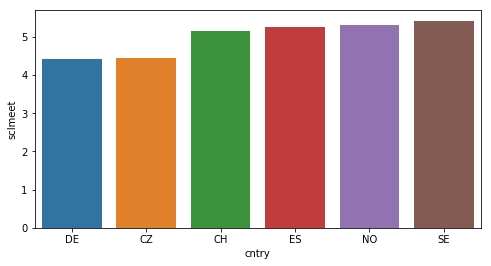

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(x='cntry',y='sclmeet',data=ESS_data_year_country_2012.sort_values(by='sclmeet'))
plt.show()

I would create 2 clusters here. DE and CZ in one, and the others (CH, ES, NO and SE) in another. However, from the second cluster of CH, ES, NO and SE they are increasing in social meetings in that order.

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [68]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','agea'],as_index=False)['sclact'].mean()

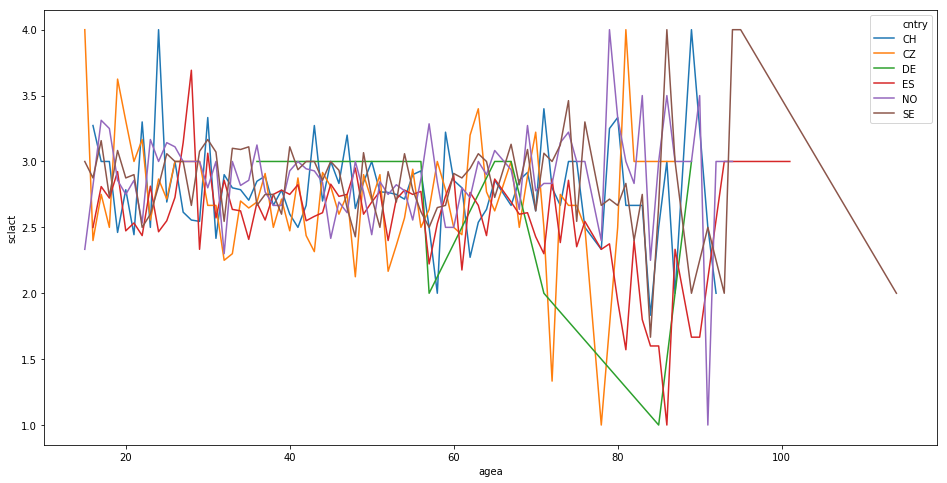

In [74]:
plt.figure(figsize=(16,8))
sns.lineplot(x='agea',y='sclact',data=ESS_data_year_country_2012, hue='cntry')
plt.show()